Watershed algorithm :
transformation treats the image it operates upon like a topographic map, with the brightness of each point representing its
height and finds the lines that run along the tops of ridges

this algorithm is especially useful for segmenting images into background and foreground in situations that are difficult for 
other algorithms



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img, cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

In [3]:
sep_coins = cv2.imread("../DATA/pennies.jpg")

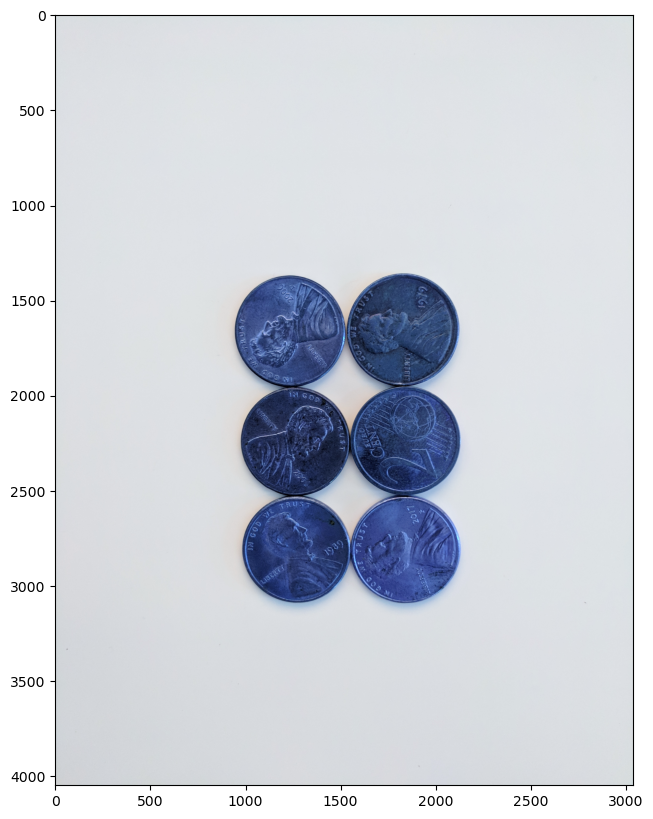

In [4]:
display(sep_coins)

In [5]:
# Median blur 

#GrayScale

# Binary threshold

# Find contours

In [6]:
sep_blur = cv2.medianBlur(sep_coins, 25)

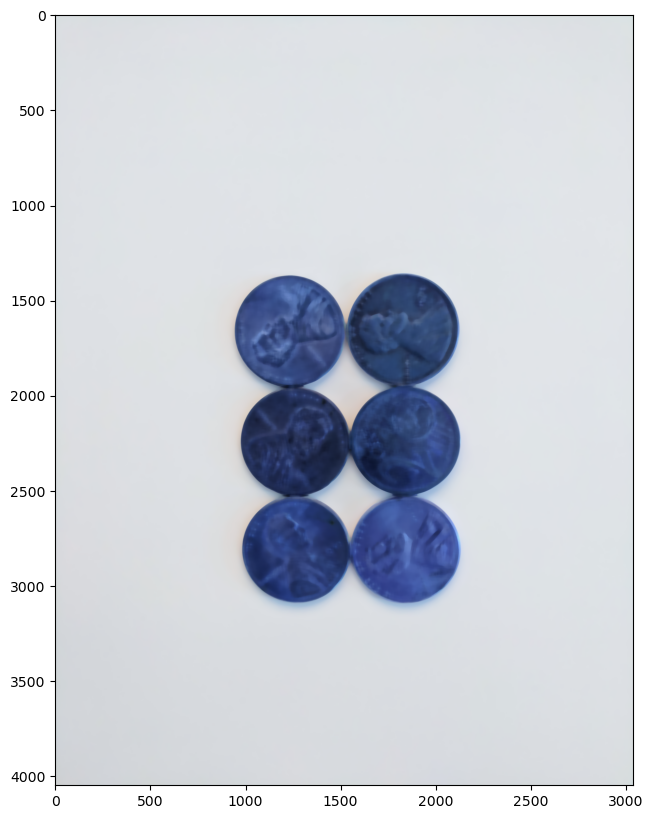

In [8]:
display(sep_blur)

In [9]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

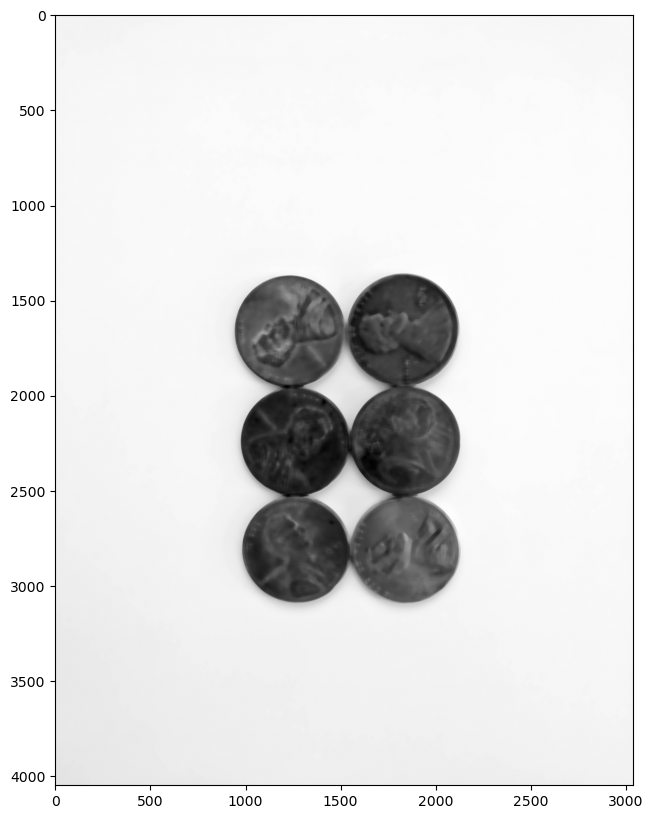

In [10]:
display(gray_sep_coins)

In [11]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)

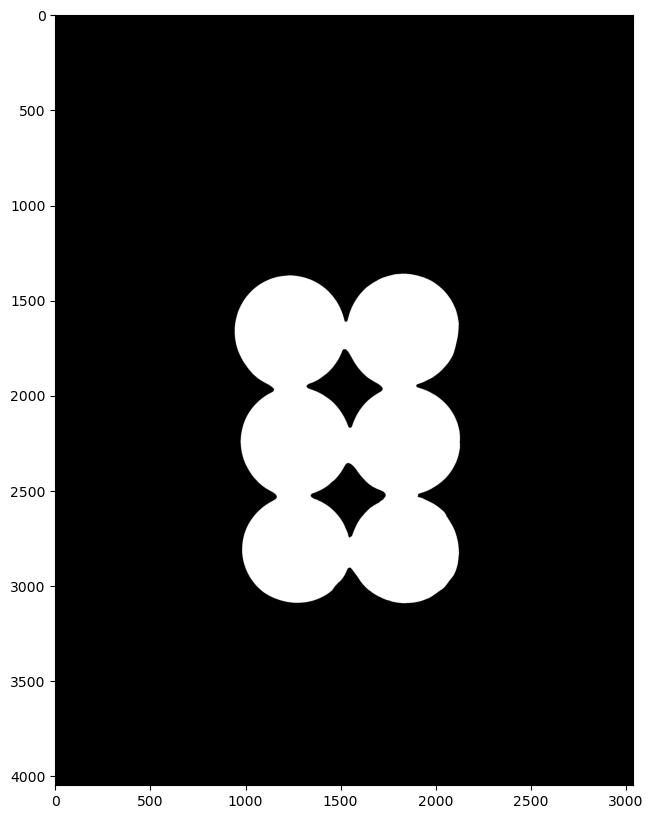

In [12]:
display(sep_thresh)

In [14]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [15]:
for i in range(len(contours)):

    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

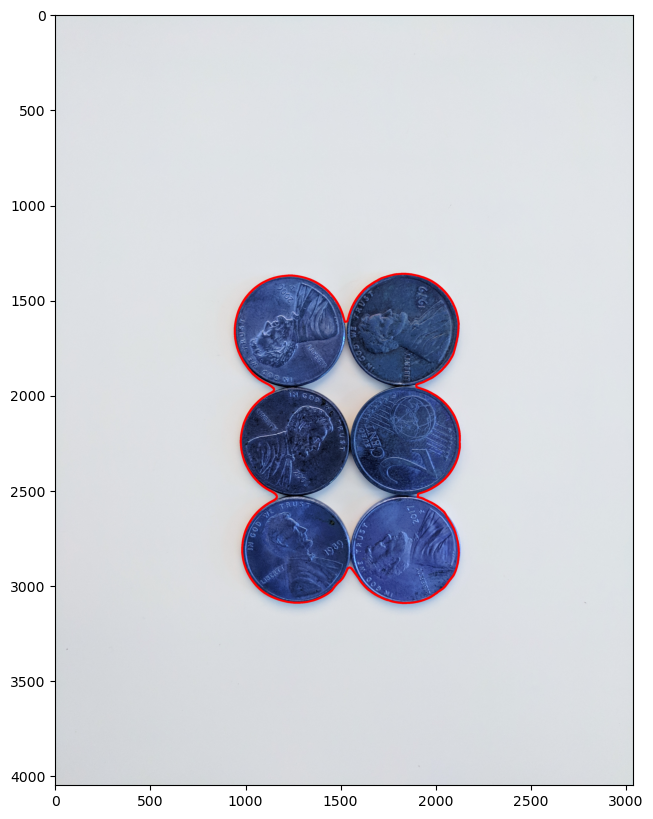

In [16]:
display(sep_coins)

# Watershed algorithm

In [17]:
img = cv2.imread("../DATA/pennies.jpg")

In [18]:
img = cv2.medianBlur(img, 35)

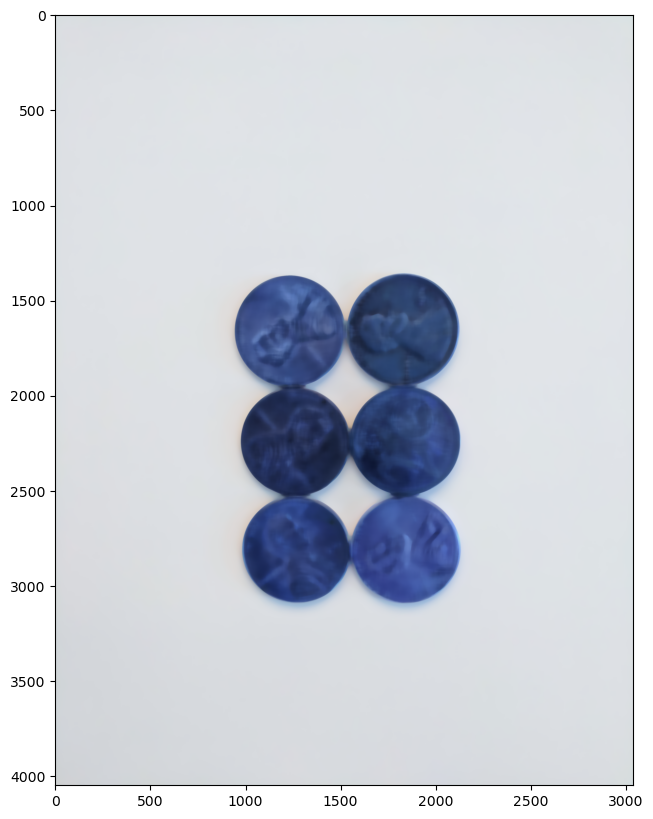

In [19]:
display(img)

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [23]:
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

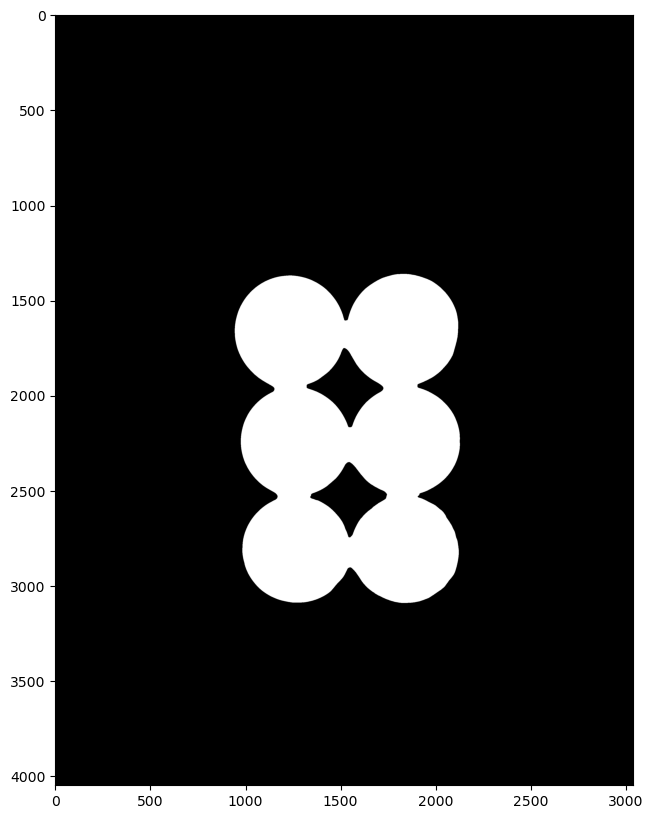

In [24]:
display(thresh)

In [25]:
# noise removal

In [26]:
kernel = np.ones((3,3), np.uint8)

In [27]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [28]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

In [37]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

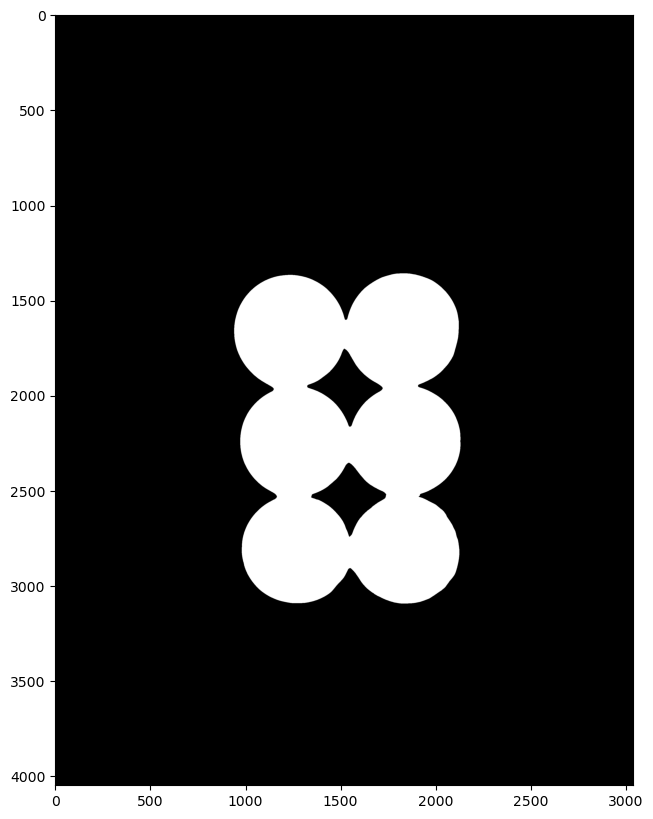

In [38]:
display(sure_bg)

In [31]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

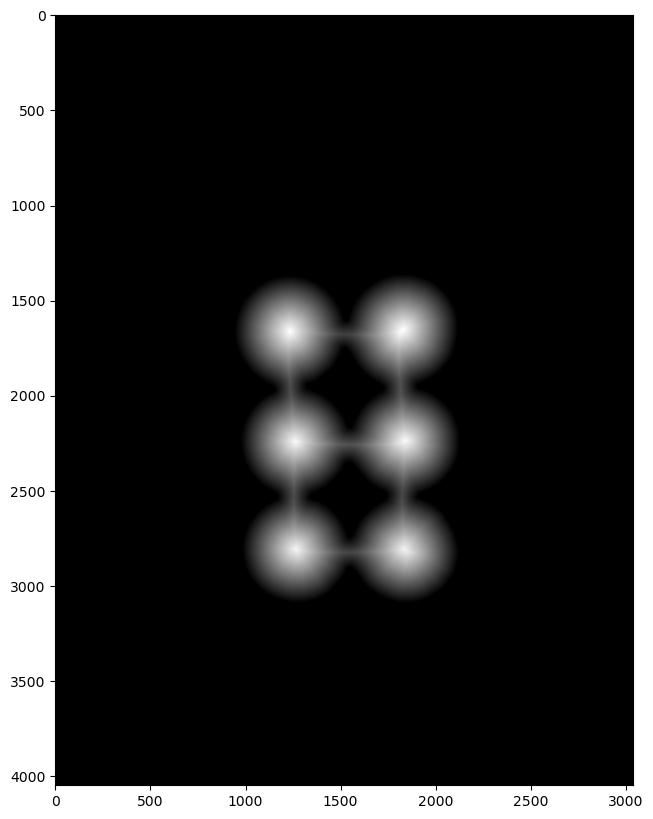

In [32]:
display(dist_transform)

In [33]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255,0)

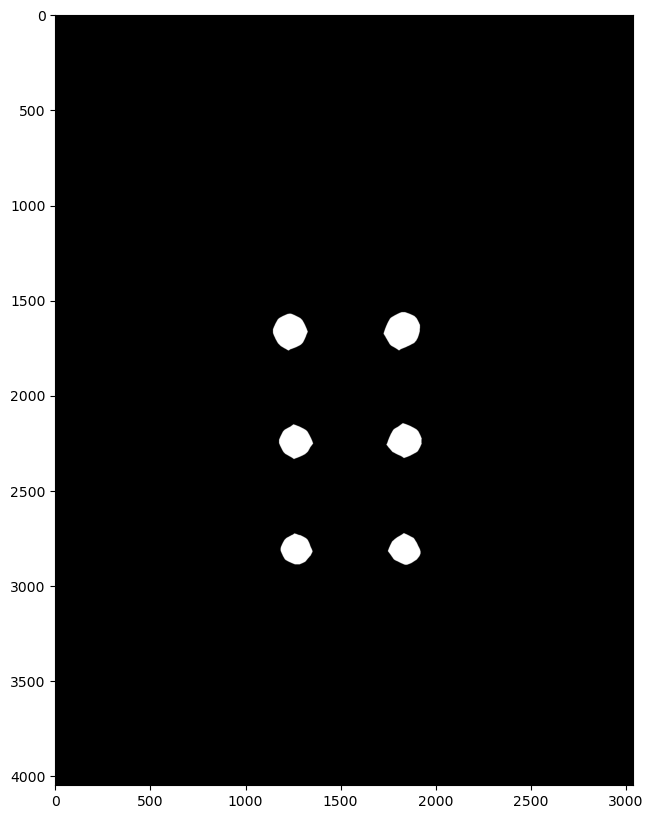

In [34]:
display(sure_fg)

In [39]:
sure_fg = np.uint8(sure_fg)

In [40]:
unknown = cv2.subtract(sure_bg, sure_fg)

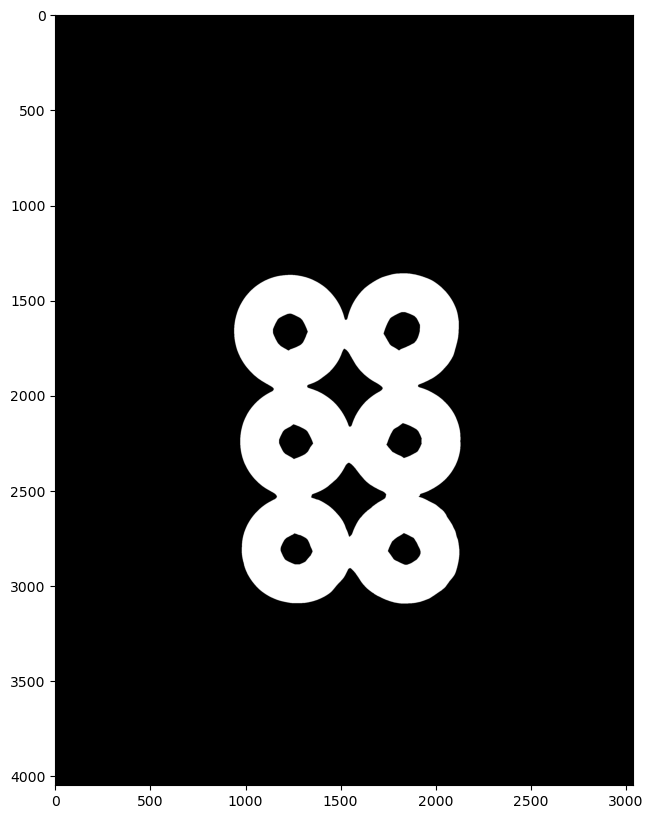

In [41]:
display(unknown)

In [42]:
ret, markers = cv2.connectedComponents(sure_fg)

In [44]:
markers = markers + 1

In [45]:
markers[unknown==255] = 0

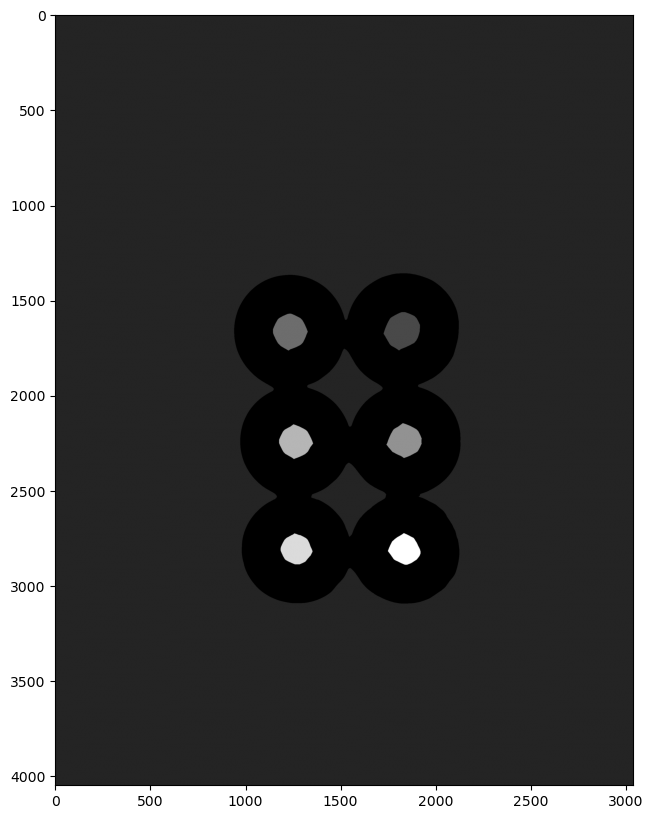

In [46]:
display(markers)

In [47]:
markers = cv2.watershed(img, markers)

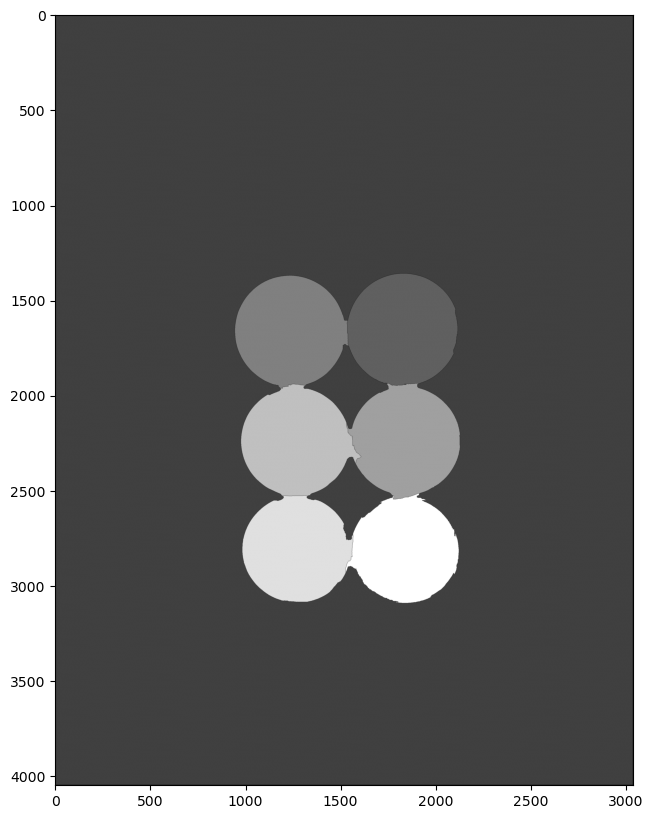

In [48]:
display(markers)

In [49]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)
    

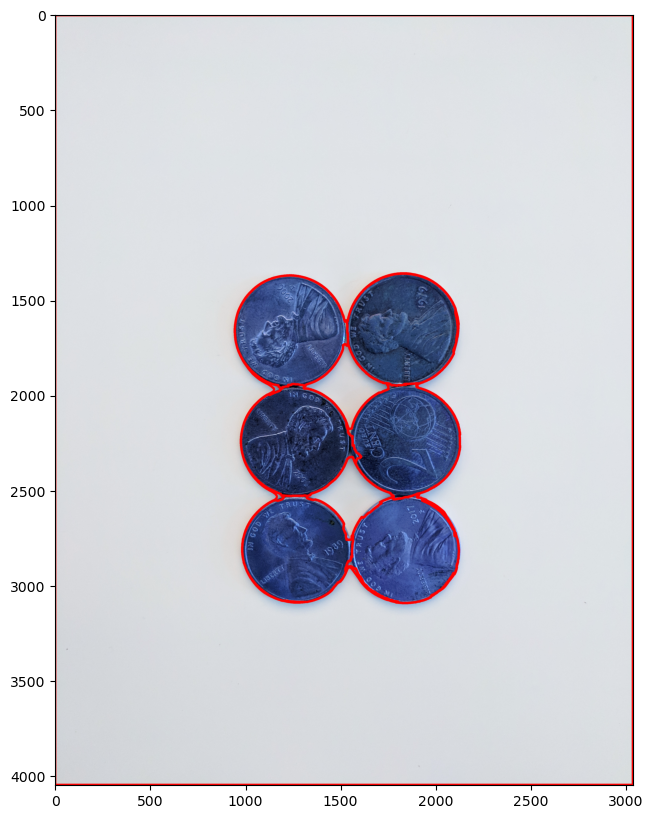

In [50]:
display(sep_coins)